# Import Libraries

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Loading the Dataset

In [3]:
df = pd.read_excel("Dataset Shrimple.xlsx")

print(df)

          Date PondID   DOC   ph  Salinity  Transparency  Alkalinity  \
0   2024-10-12    H01   NaN  8.4      10.0          50.0       102.0   
1   2024-10-12    A01   NaN  8.5      14.0          45.0        85.0   
2   2024-10-12    A02   NaN  8.5      10.0          45.0        68.0   
3   2024-10-13    H01   NaN  8.5       9.0          50.0       119.0   
4   2024-10-13    A01   NaN  8.6      14.0          50.0       102.0   
..         ...    ...   ...  ...       ...           ...         ...   
641 2025-01-29    P08  31.0  9.7      33.9          50.0       139.0   
642 2025-01-30    P01  52.0  9.3      37.8          49.0       130.0   
643 2025-01-30    P16  64.0  5.6      31.7          47.0       112.0   
644 2025-01-31    P09  55.0  6.0      31.7           2.0        93.0   
645 2025-01-31    P12  28.0  5.6      33.0          46.0       140.0   

          Status  
0      Breedable  
1      Breedable  
2      Breedable  
3      Breedable  
4      Breedable  
..           ...  
64

# Exploratory Data Analysis

## The first five rows of the Dataframe

In [4]:
print("HEAD \n", df.head(), "\n")


HEAD 
         Date PondID  DOC   ph  Salinity  Transparency  Alkalinity     Status
0 2024-10-12    H01  NaN  8.4      10.0          50.0       102.0  Breedable
1 2024-10-12    A01  NaN  8.5      14.0          45.0        85.0  Breedable
2 2024-10-12    A02  NaN  8.5      10.0          45.0        68.0  Breedable
3 2024-10-13    H01  NaN  8.5       9.0          50.0       119.0  Breedable
4 2024-10-13    A01  NaN  8.6      14.0          50.0       102.0  Breedable 



## Summary

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          646 non-null    datetime64[ns]
 1   PondID        646 non-null    object        
 2   DOC           527 non-null    float64       
 3   ph            621 non-null    float64       
 4   Salinity      646 non-null    float64       
 5   Transparency  639 non-null    float64       
 6   Alkalinity    403 non-null    float64       
 7   Status        646 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 40.5+ KB
None


## Descriptive Statistics

In [6]:

print("\n", df.describe())


                                 Date         DOC          ph    Salinity  \
count                            646  527.000000  621.000000  646.000000   
mean   2024-12-03 17:41:03.157894656   35.856736    7.830596   14.436842   
min              2024-10-01 00:00:00    2.000000    4.300000   -2.500000   
25%              2024-11-02 06:00:00   22.000000    7.700000    6.000000   
50%              2024-12-02 00:00:00   31.000000    8.000000   10.000000   
75%              2025-01-07 18:00:00   54.000000    8.500000   16.750000   
max              2025-01-31 00:00:00   66.000000   12.000000   43.800000   
std                              NaN   18.268979    1.170690   12.251600   

       Transparency  Alkalinity  
count    639.000000  403.000000  
mean      32.549296  112.669975  
min        0.000000   68.000000  
25%       10.000000  100.000000  
50%       35.000000  114.000000  
75%       49.000000  127.000000  
max       75.000000  140.000000  
std       20.309139   16.439025  


## Shape of the Dataframe
The repesentation of the number of rows and columns in a dataframe as a tuple.

In [7]:
print(df.shape)

(646, 8)


## Columns

In [8]:
print(df.columns.tolist())

['Date', 'PondID', 'DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity', 'Status']


## Missing and Duplicate Values

In [34]:
print("Missing values")
print(df.isnull().sum(), "\n")

print("Duplicate Values")
print(df.nunique())

Missing values
Date              0
PondID            0
DOC             119
ph               25
Salinity          0
Transparency      7
Alkalinity      243
Status            0
dtype: int64 

Duplicate Values
Date            123
PondID           28
DOC              66
ph               54
Salinity        170
Transparency     36
Alkalinity       57
Status            2
dtype: int64


## Class Distribution

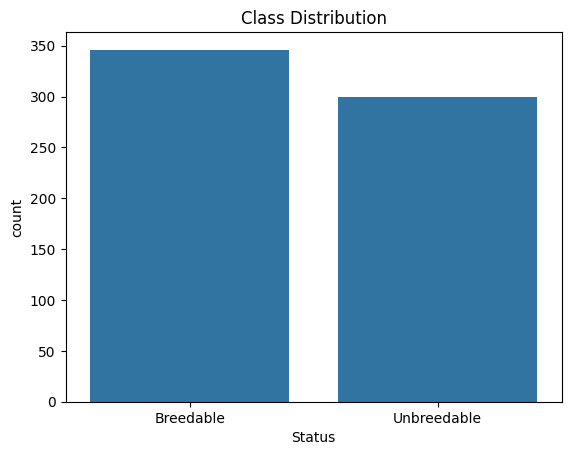

In [18]:
sns.countplot(x="Status", data=df)
plt.title("Class Distribution")
plt.show()

## Feature Distribution

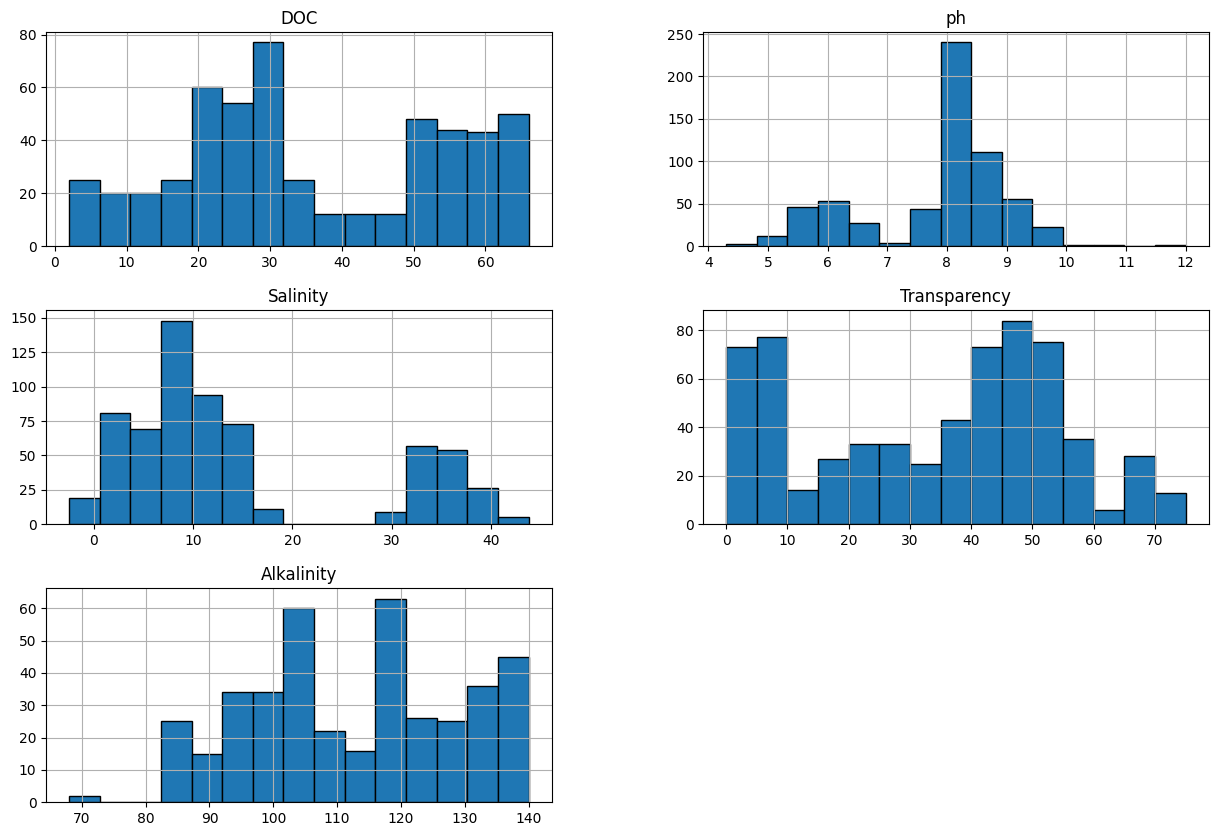

In [15]:
df[['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.show()

## Outliers

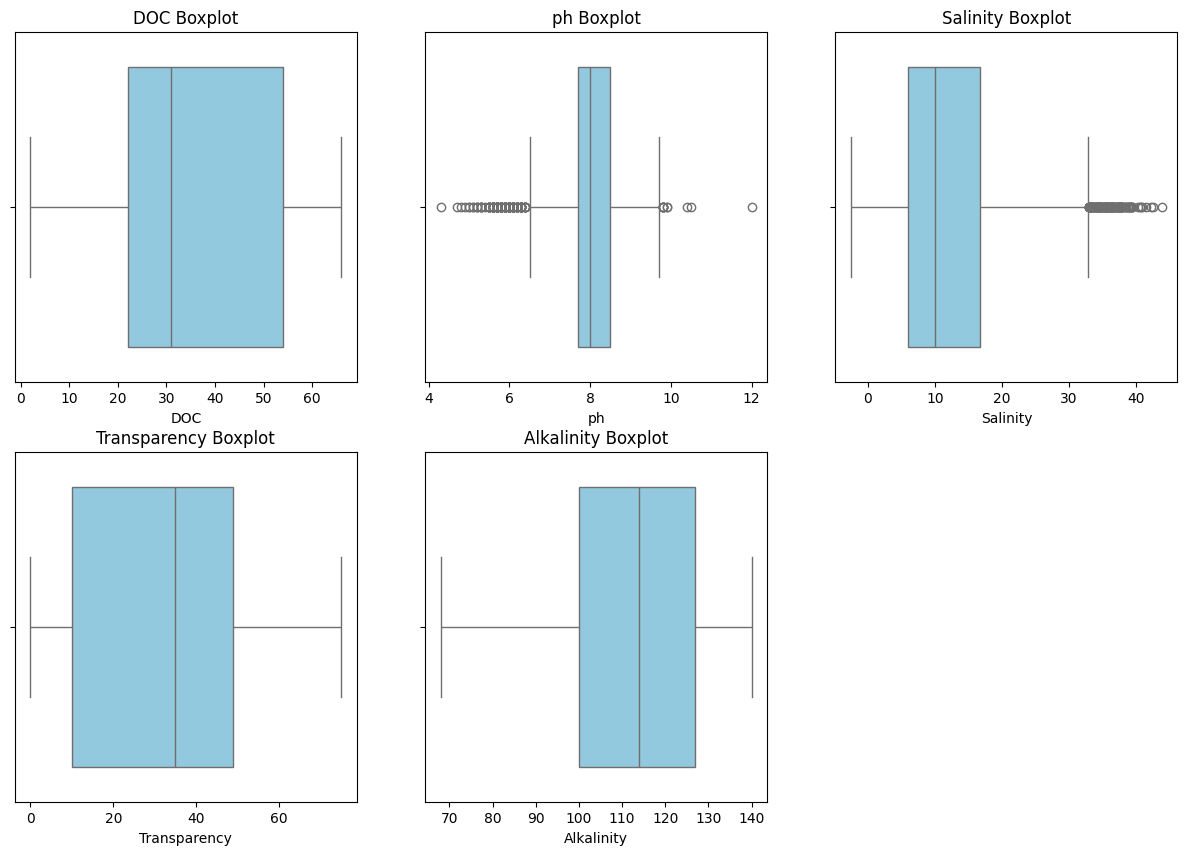

In [41]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)